# Importing Libiraries 

In [55]:
import pandas as pd #file
import numpy as np #math
import matplotlib.pyplot as plt #graph 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings 
warnings.filterwarnings('ignore')

# Read Data File 

In [56]:
path = r'D:\Forth semester\Data Science\ProJect\adultNEW.csv'
data = pd.read_csv(path)

In [57]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [65]:
duplicate_rows = data[data.duplicated()]
print('Number of duplicate rows : ',duplicate_rows.shape[0])

Number of duplicate rows :  24


In [66]:
new_data = data.drop_duplicates()

In [67]:
duplicate_rows = new_data[new_data.duplicated()]
print('Number of duplicate rows : ',duplicate_rows.shape[0])

Number of duplicate rows :  0


In [68]:
x = new_data.iloc[ : ,[0,2,4,10,11,12]]
y = new_data.iloc[ : , -1]

In [69]:
x.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [70]:
y.head(10)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8      >50K
9      >50K
Name: income, dtype: object

# Scaling the traing Data

In [71]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [72]:
x[1]

array([ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
       -2.22248299])

In [73]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 44 , shuffle = True )

In [74]:
x_train

array([[ 2.01018519, -1.58654813, -1.19840658, -0.14597544, -0.21674317,
        -1.65552985],
       [-0.99617055, -0.33006393,  1.13477712, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.28947355, -0.25056024, -0.03181473, -0.14597544, -0.21674317,
        -0.44063027],
       ...,
       [-0.26291305, -1.36274032, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-0.40956455,  1.26794887, -0.03181473, -0.14597544, -0.21674317,
        -0.03566374],
       [ 0.91029895, -0.99836104, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374]])

In [75]:
y_train

9375      <=50K
28553      >50K
23945     <=50K
10569     <=50K
8540       >50K
          ...  
16961      >50K
25788     <=50K
27394     <=50K
3491      <=50K
14105     <=50K
Name: income, Length: 26029, dtype: object

In [76]:
print('x_train shape is : ',x_train.shape)
print('x_test shape is : ',x_test.shape)
print('y_train shape is : ',y_train.shape)
print('y_test shape is : ',y_test.shape)

x_train shape is :  (26029, 6)
x_test shape is :  (6508, 6)
y_train shape is :  (26029,)
y_test shape is :  (6508,)


## Apply Decision Tree Classifier

In [77]:
treemodel = DecisionTreeClassifier()

In [78]:
parametr = { 'criterion' : ['gini','entropy','log_loss'] , 
             'max_depth' : [1,2,3,4,5]
}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
cv = GridSearchCV(treemodel , parametr , scoring = 'accuracy' , cv = 5)

In [81]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [82]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [83]:
y_predtree = cv.predict(x_test)

# Calculate The Accuracy 

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train , cv.predict(x_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, cv.predict(x_test))))

Train accuracy :0.83
Test accuracy :0.83


In [87]:
X = new_data.iloc[ : ,[0,2,4,10,11,12]].values
Y = new_data.iloc[ : , -1].values

In [88]:
print(len(x))

32537


In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [91]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification Using KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
y_pred

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [96]:
cm

array([[4443,  443],
       [ 819,  803]], dtype=int64)

In [97]:
print('KNN Score: ',ac)

KNN Score:  0.8060848186846957


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Classification Using GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [99]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.795841016185208


# Visualize some Data

In [100]:
import seaborn as sns

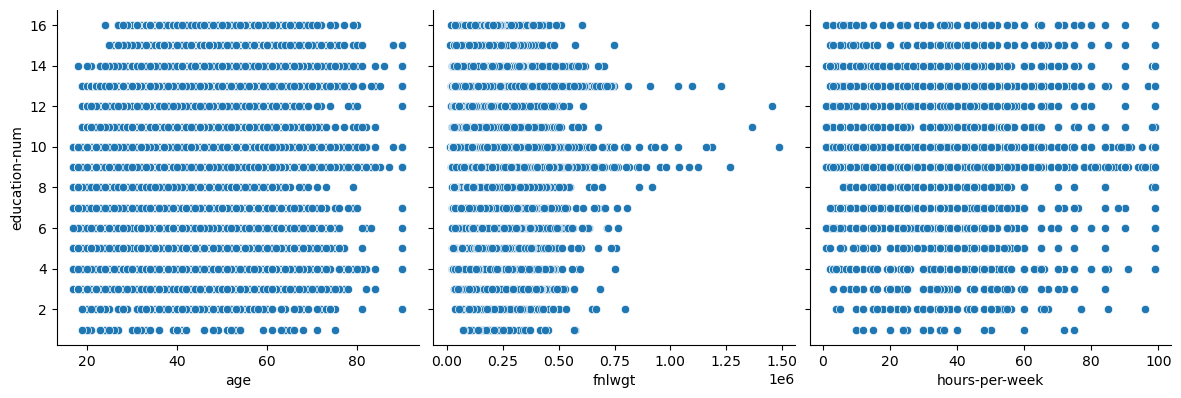

In [101]:
#to plot all the scatterplots in a single plot
sns.pairplot(new_data, x_vars=[ 'age', 'fnlwgt','hours-per-week' ], y_vars = 'education-num', size = 4, kind = 'scatter' )
plt.show()

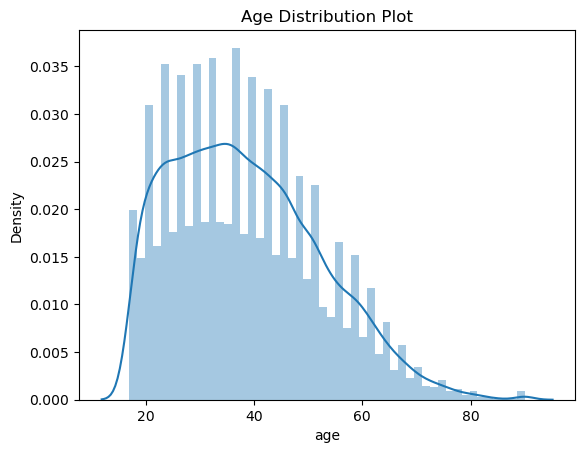

In [102]:
# Data distribution
plt.title('Age Distribution Plot')
sns.distplot(new_data['age'])
plt.show()

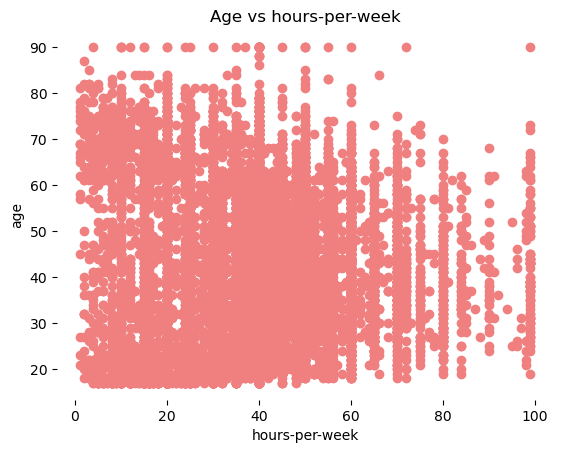

In [54]:
# Relationship between Age and hours-per-week
plt.scatter(new_data['hours-per-week'], new_data['age'], color = 'lightcoral')
plt.title('Age vs hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('age')
plt.box(False)
plt.show()